In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [3]:
df = pd.read_csv('Topic_Survey_Assignment.csv',index_col=0)
df.head(10) 

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


## Create a bar plot
Sort the data frame using the "Very interested" column in descending order

In [4]:
df = df.sort_values(by=['Very interested'], axis = 0, ascending=False)
df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


In [5]:
df = round(df/2233, 2)
df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.76,0.20,0.03
Machine Learning,0.73,0.21,0.03
Data Visualization,0.60,0.33,0.05
Big Data (Spark / Hadoop),0.60,0.33,0.06
Deep Learning,0.57,0.34,0.06


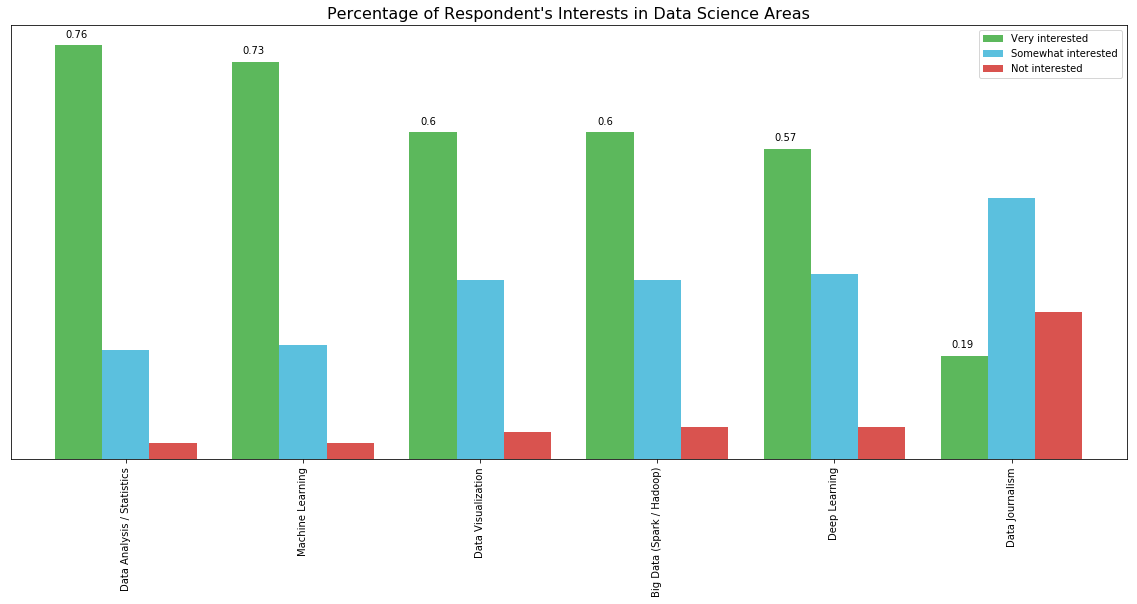

In [6]:
# plot barplot
df.plot(kind='bar',
       figsize=(20, 8),
       width=0.8,
       color=('#5cb85c', '#5bc0de', '#d9534f'))


# Create annotation texts and location based on dataframe values
txtLocs = []
annotexts = []
for i in range(0, 6):
    txtLocs.append((i-0.34, df.iloc[i, 0]+0.015))
    annotexts.append(str(df.iloc[i, 0]))

# Annotation
for txt, loc in zip(annotexts, txtLocs):
    plt.annotate(txt, loc)


# remove borders
import matplotlib as mpl
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.left"] = False
#remove ticks
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
#fontsizes:
mpl.rcParams.update({'font.size': 14})
plt.title('Percentage of Respondent\'s Interests in Data Science Areas', fontsize=16)


plt.show()

## Read SF Crime data

In [8]:
#Data Collection
# df_sf_crime = pd.read_excel('https://cocl.us/sanfran_crime_dataset')
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
print ('Data read into a pandas dataframe!')
df.head()

Data read into a pandas dataframe!


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [ ]:
# get the frequency of occurence of values in PdDistrict column in a list
dataTemp = df['PdDistrict'].value_counts()
# Convert to a dataframe
df2 = pd.DataFrame(data = dataTemp)
# set index:
df2 = df2.reset_index()
# rename columns
df2.rename(columns={'index':'Neighberhood', 'PdDistrict':'Count'}, inplace=True)
# display dataframe
df2.head(11)

In [ ]:
from IPython.display import HTML
def display(m, height=500):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

In [ ]:
# Read data:
# df_sf_crime = pd.read_excel('https://cocl.us/sanfran_crime_dataset')
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
print ('Data read into a pandas dataframe!')

In [ ]:
# define the SF map centered around SF with a low zoom level
SF_map = folium.Map(location=[37.77, -122.42], zoom_start=12#, tiles='Mapbox Bright')

# display SF map
SF_map

SF_geo = 'san-francisco.geojson' # geojson file

# create a plain world map
SF_map = folium.Map(location=[37.77, -122.42], zoom_start=11.5)

In [ ]:
# generate choropleth map using the total crime numbers per district for SF
SF_map.choropleth(
    geo_data=SF_geo,
    data=df2,
    columns=['Neighberhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)
folium.LayerControl().add_to(SF_map)
# display map
SF_map